### Variable star lightcurves

Because of the presence of flux in the reference image, alerts for variable stars require additional processing to get appropriate photometry.

In [1]:
import os
import io
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter
import fastavro

from astropy.time import Time
from astropy.io import fits
import aplpy
%matplotlib inline

/Users/ebellm/anaconda3/envs/zads/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### Read in an example

In [4]:
fname = '../../ztf-avro-alert/data/2018_09_12_619204903515015002.avro'

In [5]:
with open(fname,'rb') as f:
    freader = fastavro.reader(f)
    schema = freader.schema

    for packet in freader:
        print(packet.keys())

dict_keys(['prv_candidates', 'candidate', 'cutoutScience', 'candid', 'schemavsn', 'publisher', 'cutoutTemplate', 'cutoutDifference', 'objectId'])


In [6]:
def make_dataframe(packet):
    df = pd.DataFrame(packet['candidate'], index=[0])
    df_prv = pd.DataFrame(packet['prv_candidates'])
    return pd.concat([df,df_prv], ignore_index=True)

In [7]:
dflc = make_dataframe(packet)
dflc

,aimage,aimagerat,bimage,bimagerat,candid,chinr,chipsf,classtar,clrcoeff,clrcounc,...,sumrat,szmag1,szmag2,szmag3,tblid,tooflag,xpos,ypos,zpclrcov,zpmed
0,0.713,0.440147,0.635,0.391996,6.192049e+17,0.433,1.402062,0.851,-0.05023,0.000016,...,0.963616,15.2982,16.428801,21.003099,2.0,0.0,2396.024414,244.413300,-0.00001,26.111
1,0.830,0.624155,0.624,0.469245,5.921711e+17,0.202,15.162000,0.779,NaN,NaN,...,0.865335,NaN,NaN,NaN,6.0,NaN,2386.899902,462.742004,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.786,0.479757,0.718,0.438252,6.032322e+17,0.202,3.369860,0.981,NaN,NaN,...,0.984167,NaN,NaN,NaN,1.0,NaN,2393.270020,251.388000,NaN,NaN
5,0.821,0.328400,0.720,0.288000,6.062482e+17,0.202,6.109130,0.999,NaN,NaN,...,0.995644,NaN,NaN,NaN,0.0,NaN,2396.189941,237.703995,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.868,0.227225,0.815,0.213351,6.122074e+17,0.433,9.473560,0.983,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.0,NaN,2390.060059,246.556000,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dflc.columns

Index(['aimage', 'aimagerat', 'bimage', 'bimagerat', 'candid', 'chinr',
       'chipsf', 'classtar', 'clrcoeff', 'clrcounc', 'clrmed', 'clrrms', 'dec',
       'decnr', 'diffmaglim', 'distnr', 'distpsnr1', 'distpsnr2', 'distpsnr3',
       'dsdiff', 'dsnrms', 'elong', 'fid', 'field', 'fwhm', 'isdiffpos', 'jd',
       'jdendhist', 'jdendref', 'jdstarthist', 'jdstartref', 'magap',
       'magapbig', 'magdiff', 'magfromlim', 'maggaia', 'maggaiabright',
       'magnr', 'magpsf', 'magzpsci', 'magzpscirms', 'magzpsciunc',
       'mindtoedge', 'nbad', 'ncovhist', 'ndethist', 'neargaia',
       'neargaiabright', 'nframesref', 'nid', 'nmatches', 'nmtchps', 'nneg',
       'objectidps1', 'objectidps2', 'objectidps3', 'pdiffimfilename', 'pid',
       'programid', 'programpi', 'ra', 'ranr', 'rb', 'rbversion', 'rcid',
       'rfid', 'scorr', 'seeratio', 'sgmag1', 'sgmag2', 'sgmag3', 'sgscore1',
       'sgscore2', 'sgscore3', 'sharpnr', 'sigmagap', 'sigmagapbig',
       'sigmagnr', 'sigmapsf', 'simag1'

Let's look at the nearest PS1 sourse to determine if it's coincident and stellar:

In [9]:
dflc.loc[0,['distpsnr1','sgscore1']]

distpsnr1    0.818701
sgscore1     0.999375
Name: 0, dtype: object

The nearest PS1 object has a high star-galaxy score and is less than 1.5" away, so we will identify this as a variable star.  Let's make a small configurable function:

In [10]:
def is_star(dflc, match_radius_arcsec=1.5, star_galaxy_threshold = 0.4):
    return (dflc.loc[0,'distpsnr1'] < match_radius_arcsec) & (dflc.loc[0,'sgscore1'] > star_galaxy_threshold)

In [11]:
is_star(dflc)

True

We should also confirm that the nearest reference source from ZTF is also coincident:

In [12]:
dflc['distnr']

0     0.890279
1     0.547427
2          NaN
3          NaN
4     0.536341
5     0.059970
6          NaN
7     0.287771
8          NaN
9          NaN
10    0.582026
Name: distnr, dtype: float64

In [13]:
dflc['magnr']

0     16.656
1     15.899
2        NaN
3        NaN
4     15.899
5     15.899
6        NaN
7     16.656
8        NaN
9        NaN
10    15.899
Name: magnr, dtype: float64

There's no magnitude of the reference source when we only have upper limits--so we have to infer it using the other observations, if possible.  `magnr` will depend on the field, chip x quadrant (`rcid`), and filter.

In [14]:
grp = dflc.groupby(['fid','field','rcid'])
impute_magnr = grp['magnr'].agg(lambda x: np.median(x[np.isfinite(x)]))
impute_magnr

fid  field  rcid
1    583.0  35.0    16.656
2    583.0  35.0    15.899
Name: magnr, dtype: float64

In [15]:
 dflc[['fid','field','rcid']]

,fid,field,rcid
0,1,583.0,35.0
1,2,583.0,35.0
2,2,NaN,NaN
3,2,NaN,NaN
4,2,583.0,35.0
5,2,583.0,35.0
6,2,NaN,NaN
7,1,583.0,35.0
8,2,NaN,NaN
9,1,NaN,NaN


Unfortunately nondetections don't have field and rcid (they weren't detected, so we don't know exactly where they were), so we can't actually determine exactly what the reference magnitude should have been.  This isn't great!  Because different reference images contain different observations the reference magnitudes can vary a bit.  We'll just have to take a median and go ahead.

In [16]:
grp = dflc.groupby(['fid'])
impute_magnr = grp['magnr'].agg(lambda x: np.median(x[np.isfinite(x)]))
impute_magnr

fid
1    16.656
2    15.899
Name: magnr, dtype: float64

Now assign these imputed values to the observations with upper limits

In [17]:
for idx, grpi in grp:
    w = np.isnan(grpi['magnr'])
    w2 = grpi[w].index
    dflc.loc[w2,'magnr'] = impute_magnr[idx]

In [18]:
%pdb

Automatic pdb calling has been turned ON


In [19]:
dflc['magnr']

0     16.656
1     15.899
2     15.899
3     15.899
4     15.899
5     15.899
6     15.899
7     16.656
8     15.899
9     16.656
10    15.899
Name: magnr, dtype: float64

In [20]:
dflc['isdiffpos']

0        t
1        t
2     None
3     None
4        t
5        f
6     None
7        f
8     None
9     None
10       1
Name: isdiffpos, dtype: object

In [21]:
dflc['sign'] = 2* (dflc['isdiffpos'] == 't') - 1
dflc['sign']

0     1
1     1
2    -1
3    -1
4     1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
Name: sign, dtype: int64

Hmmm, we only have one zeropoint...

In [22]:
dflc['magzpsci']

0     26.138432
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
Name: magzpsci, dtype: float64

In [107]:
ref_mag = dflc['magnr'] # detections can come from different fields or quadrants, which may have different fluxes
ref_flux = 10**( 0.4* ( 27 - ref_mag) )

# need to determine ref_flux for the upper limits--these will differ by field/filter/quadrant!


ref_sigflux = dflc.iloc[0]['sigmagnr']/1.0857*ref_flux

dflc['difference_flux'] = 10**( 0.4* ( 27 - dflc['magpsf']) )
dflc['difference_sigflux'] = dflc['sigmapsf']/1.0857*dflc['difference_flux']



dflc['dc_flux'] = ref_flux + dflc['sign']*dflc['difference_flux']
dflc['dc_sigflux'] =  np.sqrt( dflc['difference_flux']**2 + ref_sigflux**2 )
dflc['dc_mag'] = 27 - 2.5 * np.log10(dflc['dc_flux'])
dflc['dc_sigmag'] = dflc['dc_sigflux']/dflc['dc_flux']*1.0857

# if we have a nondetection that means that there's no flux +/- 5 sigma from the ref flux (unless it's a bad subtraction)
dflc['difference_fluxlim'] = 10**( 0.4* ( 27 - dflc['diffmaglim']) )
dflc['dc_flux_ulim'] = ref_flux + dflc['difference_fluxlim']
dflc['dc_flux_llim'] = ref_flux - dflc['difference_fluxlim']
dflc['dc_mag_ulim'] = 27 - 2.5 * np.log10(dflc['dc_flux_ulim'])
dflc['dc_mag_llim'] = 27 - 2.5 * np.log10(dflc['dc_flux_llim'])

# magdiff = row['magnr'] - now_mag

In [108]:
dflc[['dc_mag','dc_sigmag', 'dc_mag_ulim', 'dc_mag_llim']]

,dc_mag,dc_sigmag,dc_mag_ulim,dc_mag_llim
0,16.575436,0.078884,16.611087,16.702852
1,15.773036,0.119676,15.878706,15.919681
2,NaN,NaN,15.875588,15.922928
3,NaN,NaN,15.868009,15.930902
4,15.756088,0.134546,15.853202,15.946816
5,16.173102,0.312393,15.859518,15.939973
6,NaN,NaN,15.865115,15.933977
7,17.040905,0.462441,16.624781,16.688144
8,NaN,NaN,15.873711,15.924893
9,NaN,NaN,16.607408,16.706870


We see that some of the historical detections are upper limits, signified by the NaNs.  Note that the most recent candidate has a few fields that are not present for the `prv_candidates`.

Let's plot it!

In [109]:
def plot_dc_lightcurve(dflc, days_ago=True):
    
    filter_color = {1:'green', 2:'red', 3:'pink'}
    if days_ago:
        now = Time.now().jd
        t = dflc.jd - now
        xlabel = 'Days Ago'
    else:
        t = dflc.jd
        xlabel = 'Time (JD)'
    
    plt.figure()
    for fid, color in filter_color.items():
        # plot detections in this filter:
        w = (dflc.fid == fid) & ~dflc.magpsf.isnull()
        if np.sum(w):
            plt.errorbar(t[w],dflc.loc[w,'dc_mag'], dflc.loc[w,'dc_sigmag'],fmt='.',color=color)
        wnodet = (dflc.fid == fid) & dflc.magpsf.isnull()
        if np.sum(wnodet):
            plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_mag_ulim'], marker='v',color=color,alpha=0.25)
            plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_mag_llim'], marker='^',color=color,alpha=0.25)

    
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.ylabel('Magnitude')
    

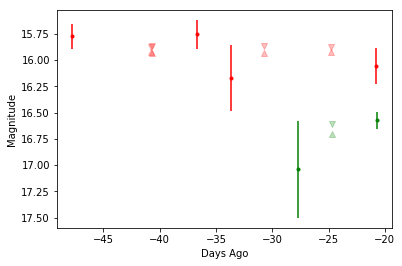

In [110]:
plot_dc_lightcurve(dflc)

In [44]:
dflc

,aimage,aimagerat,bimage,bimagerat,candid,chinr,chipsf,classtar,clrcoeff,clrcounc,...,difference_sigflux,dc_flux,dc_sigflux,dc_mag,dc_sigmag,difference_fluxlim,dc_flux_ulim,dc_flux_llim,dc_mag_ulim,dc_mag_llim
0,0.713,0.440147,0.635,0.391996,6.192049e+17,0.433,1.402062,0.851,-0.05023,0.000016,...,88.642138,14205.957644,514.428571,15.757255,0.039316,262.204037,13989.972483,13465.564409,15.773889,15.81537
1,0.830,0.624155,0.624,0.469245,5.921711e+17,0.202,15.162000,0.779,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.786,0.479757,0.718,0.438252,6.032322e+17,0.202,3.369860,0.981,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.821,0.328400,0.720,0.288000,6.062482e+17,0.202,6.109130,0.999,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.868,0.227225,0.815,0.213351,6.122074e+17,0.433,9.473560,0.983,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
